Fairly straightforward to install

In [1]:
# !pip install cpi

Libraries

In [2]:
import pandas as pd
import datetime
from cpi import inflate

Import the current working data set

In [3]:
tor_df = pd.read_csv('../../data/raw/tor_data_with_derived.csv')

For each row, adjust the listed property damage from its listed month/year to Jan/2018

In [4]:
adjusted_damages = []
for i in range(len(tor_df)):
    julian_day = str(tor_df['JULIAN_DAY'][i])
    year = str(tor_df['YEAR'][i])
    while len(julian_day) < 3:
        julian_day = '0' + julian_day
    curr_date = datetime.datetime.strptime(julian_day+year, '%j%Y').date()
    adjust_dam = inflate(tor_df['DAMAGE_PROPERTY'][i], curr_date, to = datetime.date(2018, 1, 1))
    adjusted_damages.append(adjust_dam)

Visualization for assurance

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

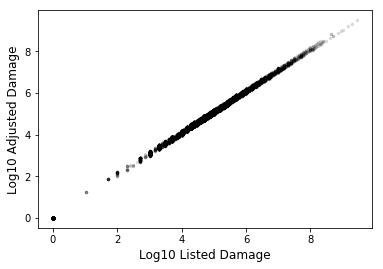

In [6]:
plt.scatter(x = np.log10(tor_df['DAMAGE_PROPERTY'] + 1),
            y = np.log10(np.asarray(adjusted_damages) + 1),
            color = 'black', alpha = 0.1, s = 25, marker = '.')
plt.xlabel('Log10 Listed Damage', fontsize = 12)
plt.ylabel('Log10 Adjusted Damage', fontsize = 12);

Replace the existing column

In [7]:
tor_df['DAMAGE_PROPERTY'] = adjusted_damages

Save the data

In [8]:
tor_df.to_csv('../../data/raw/tor_data_inflation_adj.csv', index = False)